In [1]:
import akshare as ak
df=ak.stock_zh_a_hist(symbol="000001",period="daily",start_date="20230101",end_date="20231231",adjust='qfq')
print(df.columns)
df['MA5'] = df['收盘'].rolling(window=5).mean()
df['MA20'] = df['收盘'].rolling(window=20).mean()
df['signal'] = df['MA5'] > df['MA20']
df.dropna(inplace=True)
df.head()

Index(['日期', '股票代码', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额',
       '换手率'],
      dtype='object')


,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,MA5,MA20,signal
19,2023-02-06,000001,12.25,12.15,12.28,12.01,1317610,1.838429e+09,2.17,-2.57,-0.32,0.68,12.672,12.8430,False
20,2023-02-07,000001,12.21,12.36,12.47,12.18,869460,1.235298e+09,2.39,1.73,0.21,0.45,12.516,12.8650,False
21,2023-02-08,000001,12.39,12.19,12.47,12.18,657893,9.287089e+08,2.35,-1.38,-0.17,0.34,12.384,12.8510,False
22,2023-02-09,000001,12.16,12.28,12.45,12.11,830350,1.174362e+09,2.79,0.74,0.09,0.43,12.290,12.8335,False
23,2023-02-10,000001,12.25,12.13,12.27,12.01,847284,1.184283e+09,2.12,-1.22,-0.15,0.44,12.222,12.8015,False


开始绘制K线和均线图...


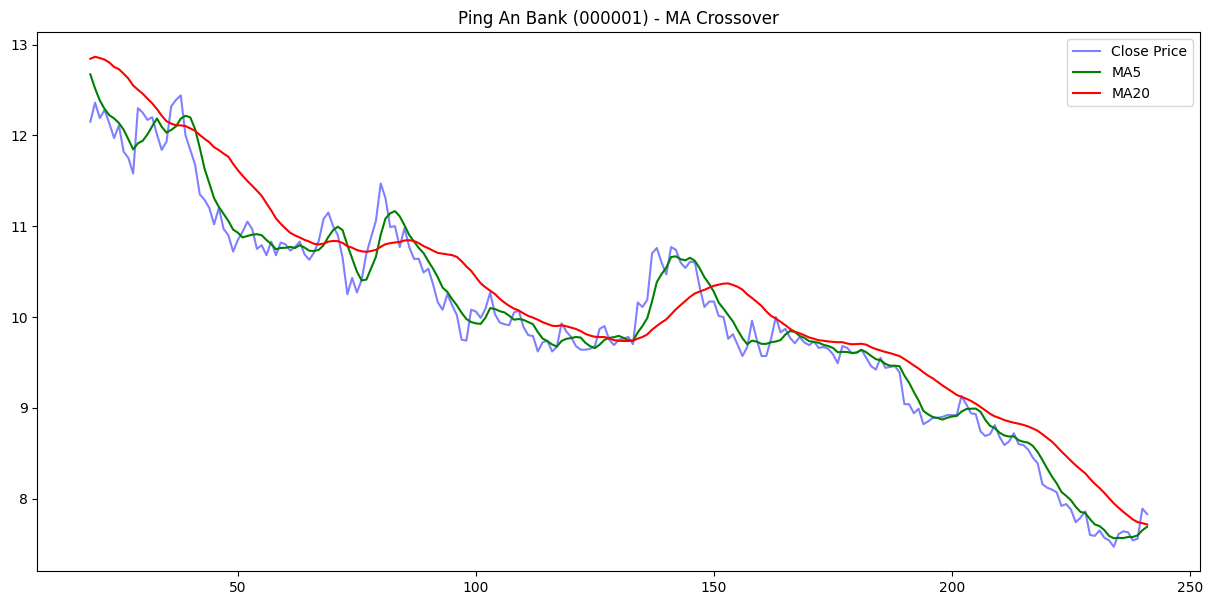

In [2]:
import matplotlib.pyplot as plt
print("开始绘制K线和均线图...")
plt.figure(figsize=(15,7))
plt.plot(df["收盘"],label='Close Price',color='blue',alpha=0.5)
plt.plot(df["MA5"],label='MA5',color='green')
plt.plot(df["MA20"],label='MA20',color='red')
plt.title("Ping An Bank (000001) - MA Crossover")
#显示图例
plt.legend()
plt.show()

只包含金叉的日子（前5天）：
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
38  2023-03-03  000001  12.50  12.44  12.52  12.29   690954  9.855521e+08   
39  2023-03-06  000001  12.45  12.00  12.45  11.87  1455824  2.023955e+09   
40  2023-03-07  000001  12.00  11.84  12.25  11.80  1279266  1.773655e+09   
41  2023-03-08  000001  11.78  11.68  11.79  11.55  1096898  1.479839e+09   
69  2023-04-18  000001  11.08  11.15  11.35  11.04  1538936  2.009935e+09   

      振幅   涨跌幅   涨跌额   换手率     MA5     MA20  signal  
38  1.86  0.40  0.05  0.36  12.184  12.1095    True  
39  4.66 -3.54 -0.44  0.75  12.216  12.1020    True  
40  3.75 -1.33 -0.16  0.66  12.198  12.0760    True  
41  2.03 -1.35 -0.16  0.57  12.070  12.0505    True  
69  2.80  0.63  0.07  0.79  10.882  10.8295    True  


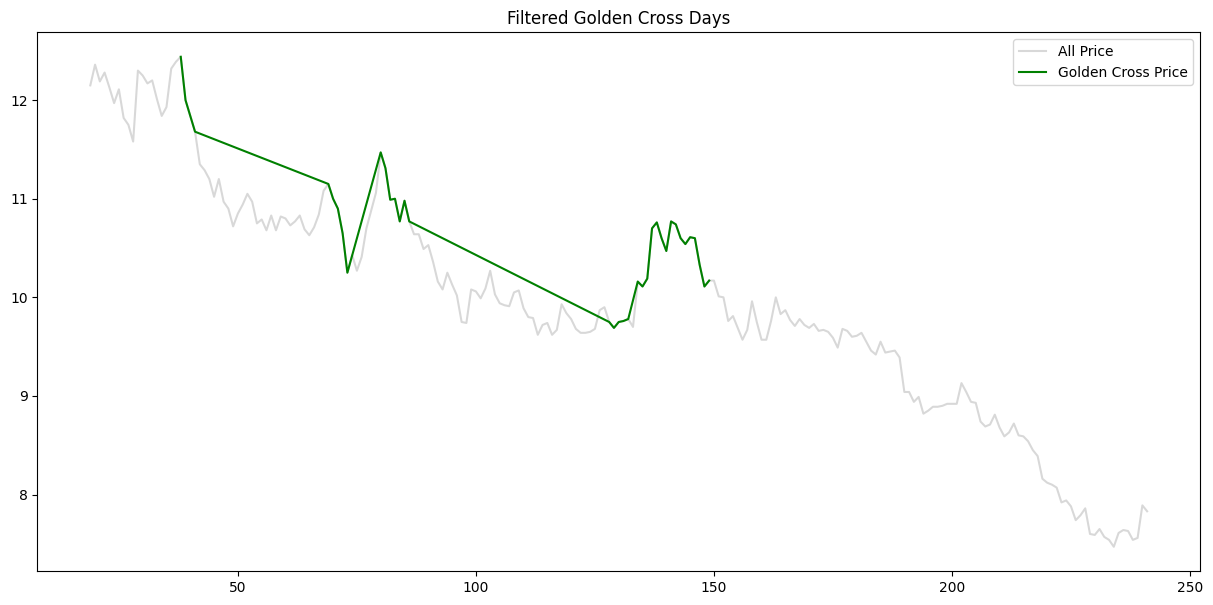

In [6]:
golden_cross_days = df[df['signal']]
print("只包含金叉的日子（前5天）：")
print(golden_cross_days.head())
plt.figure(figsize=(15,7))
plt.plot(df['收盘'],label="All Price",color='gray',alpha=0.3)
plt.plot(golden_cross_days['收盘'],label='Golden Cross Price',color='green')
plt.title('Filtered Golden Cross Days')
plt.legend()
plt.show()

Index(['日期', '股票代码', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额',
       '换手率', 'MA5', 'MA20', 'signal'],
      dtype='object')
开始绘制跌涨幅频率直方图...


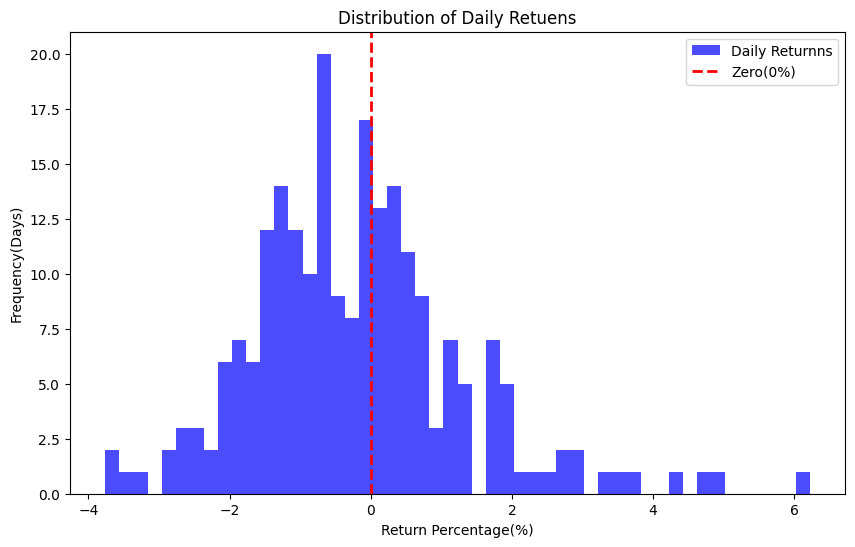

In [10]:
print(df.columns)
print("开始绘制跌涨幅频率直方图...")
plt.figure(figsize=(10,6))
plt.hist(df['涨跌幅'],bins=50,alpha=0.7,color='blue',label='Daily Returnns')
plt.axvline(0,color='red',linestyle='--',linewidth=2,label='Zero(0%)')
plt.title('Distribution of Daily Retuens')
plt.xlabel('Return Percentage(%)')
plt.ylabel('Frequency(Days)')
plt.legend()
plt.show()

In [11]:
print("开始重建RSI指标...")
delta = df['收盘'].diff()
gain = delta.where(delta>0,0)
loss = -delta.where(delta < 0,0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain/avg_loss
rsi = 100-(100/(1+rs))
df['RSI'] = rsi
df.dropna(inplace=True)
print('RSI已重建，最后五行数据：')
print(df[['日期','收盘','RSI']].tail)

开始重建RSI指标...
RSI已重建，最后五行数据：
<bound method NDFrame.tail of              日期     收盘        RSI
32   2023-02-23  12.20  51.072961
33   2023-02-24  12.01  47.222222
34   2023-02-27  11.84  39.516129
35   2023-02-28  11.93  44.583333
36   2023-03-01  12.32  50.740741
..          ...    ...        ...
237  2023-12-25   7.63  35.922330
238  2023-12-26   7.54  31.818182
239  2023-12-27   7.56  34.905660
240  2023-12-28   7.89  56.000000
241  2023-12-29   7.83  51.587302

[210 rows x 3 columns]>


开始绘制RSI与涨跌幅关系散点图


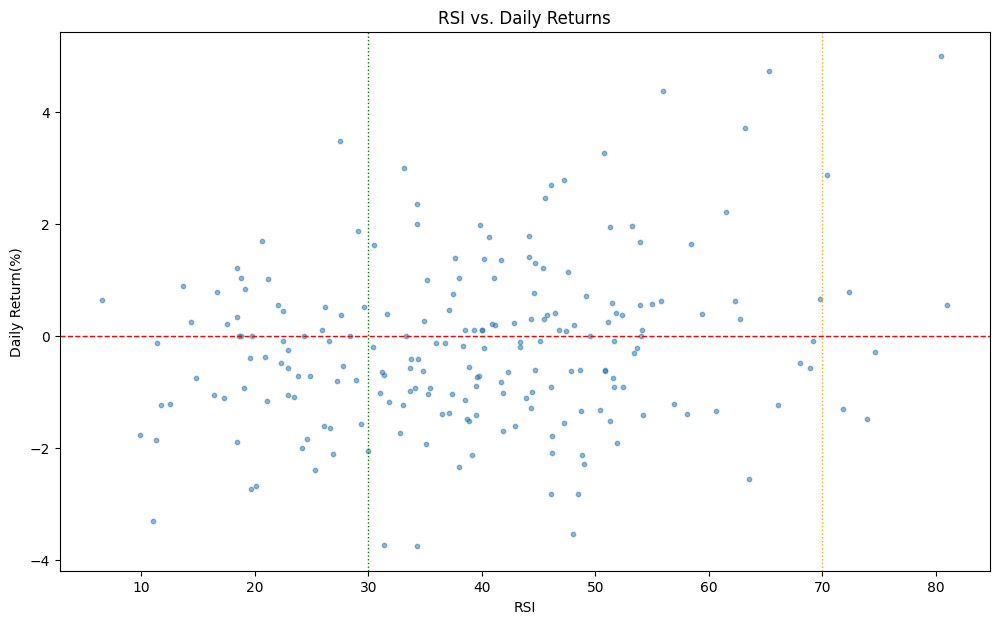

In [12]:
df.dropna(inplace=True)
print("开始绘制RSI与涨跌幅关系散点图")
plt.figure(figsize=(12,7))
plt.scatter(
    df["RSI"],
    df["涨跌幅"],
    alpha=0.5,
    s=10
)
plt.axhline(0,color='red',linestyle='--',linewidth=1)
plt.axvline(30,color='green',linestyle=':',linewidth=1)
plt.axvline(70,color='orange',linestyle=':',linewidth=1)

plt.title('RSI vs. Daily Returns')
plt.xlabel('RSI')
plt.ylabel('Daily Return(%)')
plt.show()

In [14]:
print('开始重建特征...')
df['Signal_RSI_Week'] = df['RSI'] < 30
df['Signal_RSI_Hot'] = df['RSI'] > 70
df.drop('RSI',axis=1,inplace=True)
print("特征重建完毕，查看新列：")
print(df[['日期','收盘','Signal_RSI_Week','Signal_RSI_Hot']].tail())

开始重建特征...
特征重建完毕，查看新列：
             日期    收盘  Signal_RSI_Week  Signal_RSI_Hot
237  2023-12-25  7.63            False           False
238  2023-12-26  7.54            False           False
239  2023-12-27  7.56            False           False
240  2023-12-28  7.89            False           False
241  2023-12-29  7.83            False           False
